In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"

data = np.genfromtxt("Data/housing.csv", delimiter=",", skip_header=1)[:, :-1]
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)
y_train_raw = y_train_raw.reshape(-1, 1)
y_test_raw = y_test_raw.reshape(-1, 1)

scaler1 = StandardScaler()
scaler_x = scaler1.fit(X_train_raw)
X_train = scaler_x.transform(X_train_raw)
X_test = scaler_x.transform(X_test_raw)

scaler2 = StandardScaler()
scaler_y = scaler2.fit(y_train_raw)
y_train = scaler_y.transform(y_train_raw)
y_test = scaler_y.transform(y_test_raw)

X_train = torch.tensor(X_train, dtype=torch.float32, device=device).to(device=device)
y_train = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1).to(device=device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device=device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device=device)

In [2]:
activation_lst = [nn.Sigmoid(), nn.ReLU(), nn.Tanh()]

def model_activations(activation):
    model = nn.Sequential(
        nn.Linear(8, 100),
        activation,
        nn.Linear(100, 50),
        activation,
        nn.Linear(50, 10),
        activation,
        nn.Linear(10, 1))
    model.to(device=device)
    return model

# Dropout does not work for this model... We have a very small model!

In [3]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

def train_model(model):
    loss_fn = nn.MSELoss().to(device=device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=50, shuffle=True)
    n_epochs = 30

    best_mse = np.inf
    loss_values = []
    for epoch in range(n_epochs):
        running_loss = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            model.eval()
            mse = float(loss)
            running_loss += mse
            if mse < best_mse:
                best_mse = mse
        loss_values.append(running_loss/len(train_loader))
        print(f'Finished epoch {epoch}, latest loss {loss}')
        print("Best MSE:", best_mse)
        
        # y_pred = model(scaler_x.inverse_transform(X_test))
        # acc = (y_pred.round() == scaler_y.inverse_transform(y_test)).float().mean()
        # acc = float(acc)
        # print(f"End of {epoch}, accuracy {acc}")
    plt.plot(loss_values)
    plt.show()


Sigmoid()
Finished epoch 0, latest loss 0.21870021522045135
Best MSE: 0.21870021522045135
Finished epoch 1, latest loss 0.3684224784374237
Best MSE: 0.1752600222826004
Finished epoch 2, latest loss 0.20835363864898682
Best MSE: 0.1327657848596573
Finished epoch 3, latest loss 0.1241389736533165
Best MSE: 0.08876168727874756
Finished epoch 4, latest loss 0.39061760902404785
Best MSE: 0.08876168727874756
Finished epoch 5, latest loss 0.21306268870830536
Best MSE: 0.08876168727874756
Finished epoch 6, latest loss 0.26293861865997314
Best MSE: 0.08876168727874756
Finished epoch 7, latest loss 0.29759547114372253
Best MSE: 0.07953841984272003
Finished epoch 8, latest loss 0.5025163888931274
Best MSE: 0.07953841984272003
Finished epoch 9, latest loss 0.10664540529251099
Best MSE: 0.07953841984272003
Finished epoch 10, latest loss 0.22264699637889862
Best MSE: 0.07953841984272003
Finished epoch 11, latest loss 0.2255462408065796
Best MSE: 0.07953841984272003
Finished epoch 12, latest loss 0.5

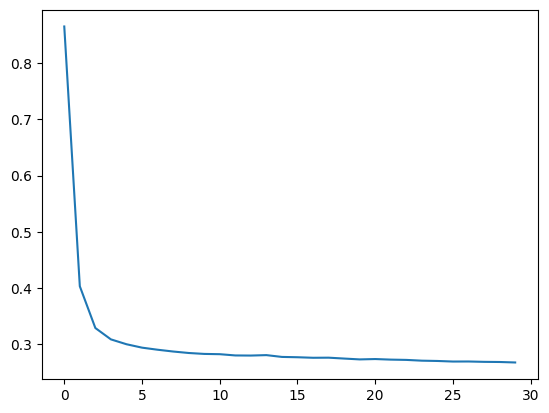

None
ReLU()
Finished epoch 0, latest loss 0.16922782361507416
Best MSE: 0.12732140719890594
Finished epoch 1, latest loss 0.40784895420074463
Best MSE: 0.12403445690870285
Finished epoch 2, latest loss 0.23558978736400604
Best MSE: 0.08846168965101242
Finished epoch 3, latest loss 0.15623871982097626
Best MSE: 0.06743192672729492
Finished epoch 4, latest loss 0.21866688132286072
Best MSE: 0.06743192672729492
Finished epoch 5, latest loss 0.21552464365959167
Best MSE: 0.06743192672729492
Finished epoch 6, latest loss 0.04979340732097626
Best MSE: 0.04979340732097626
Finished epoch 7, latest loss 0.22154593467712402
Best MSE: 0.04979340732097626
Finished epoch 8, latest loss 0.8529398441314697
Best MSE: 0.04979340732097626
Finished epoch 9, latest loss 0.22652801871299744
Best MSE: 0.04979340732097626
Finished epoch 10, latest loss 0.16124045848846436
Best MSE: 0.04979340732097626
Finished epoch 11, latest loss 0.30282557010650635
Best MSE: 0.04979340732097626
Finished epoch 12, latest l

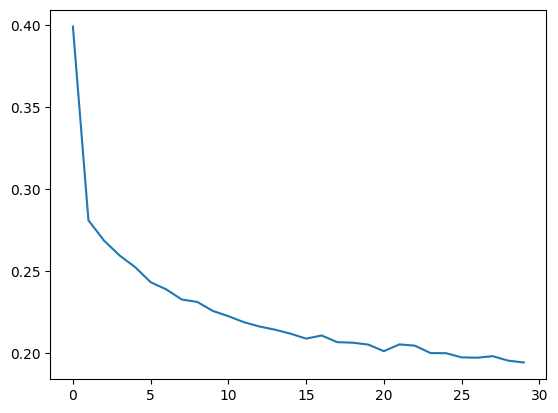

None
Tanh()
Finished epoch 0, latest loss 0.03370989114046097
Best MSE: 0.03370989114046097
Finished epoch 1, latest loss 0.2655767798423767
Best MSE: 0.03370989114046097
Finished epoch 2, latest loss 0.3736160397529602
Best MSE: 0.03370989114046097
Finished epoch 3, latest loss 0.3245686888694763
Best MSE: 0.03370989114046097
Finished epoch 4, latest loss 0.41683492064476013
Best MSE: 0.03370989114046097
Finished epoch 5, latest loss 0.13255903124809265
Best MSE: 0.03370989114046097
Finished epoch 6, latest loss 0.18845129013061523
Best MSE: 0.03370989114046097
Finished epoch 7, latest loss 0.07676064968109131
Best MSE: 0.03370989114046097
Finished epoch 8, latest loss 0.2094413936138153
Best MSE: 0.03370989114046097
Finished epoch 9, latest loss 0.03904758766293526
Best MSE: 0.03370989114046097
Finished epoch 10, latest loss 0.22028610110282898
Best MSE: 0.03370989114046097
Finished epoch 11, latest loss 0.06250321865081787
Best MSE: 0.03370989114046097
Finished epoch 12, latest loss

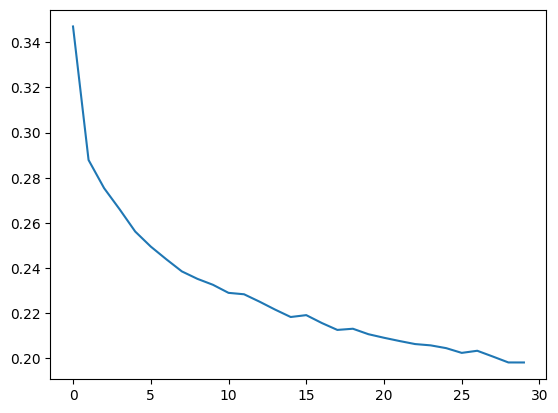

None


In [4]:
for activation in activation_lst:
    print(activation)
    print(train_model(model_activations(activation)))

Sigmoid()


Finished epoch 0, latest loss 0.201851487159729
Best MSE: 0.201851487159729
Finished epoch 1, latest loss 0.6727824211120605
Best MSE: 0.16882944107055664
Finished epoch 2, latest loss 0.35113662481307983
Best MSE: 0.1057276800274849
Finished epoch 3, latest loss 0.264437735080719
Best MSE: 0.1057276800274849
Finished epoch 4, latest loss 0.337225079536438
Best MSE: 0.10219630599021912
Finished epoch 5, latest loss 0.47813481092453003
Best MSE: 0.10219630599021912
Finished epoch 6, latest loss 0.13028006255626678
Best MSE: 0.10219630599021912
Finished epoch 7, latest loss 0.21409261226654053
Best MSE: 0.09128427505493164
Finished epoch 8, latest loss 0.44626951217651367
Best MSE: 0.09128427505493164
Finished epoch 9, latest loss 0.14522340893745422
Best MSE: 0.08550754189491272
Finished epoch 10, latest loss 0.1233283281326294
Best MSE: 0.08339284360408783
Finished epoch 11, latest loss 0.08089961111545563
Best MSE: 0.08089961111545563
Finished epoch 12, latest loss 0.8111754655838013


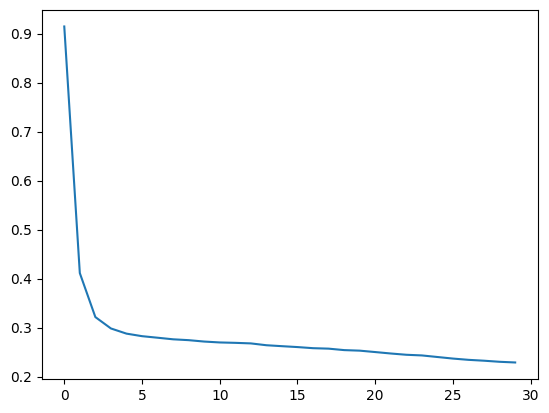

None
ReLU()
Finished epoch 0, latest loss 0.6912879347801208
Best MSE: 0.1504461020231247
Finished epoch 1, latest loss 0.06628094613552094
Best MSE: 0.06628094613552094
Finished epoch 2, latest loss 0.40671586990356445
Best MSE: 0.060750387609004974
Finished epoch 3, latest loss 0.4169524610042572
Best MSE: 0.060750387609004974
Finished epoch 4, latest loss 0.41545745730400085
Best MSE: 0.060750387609004974
Finished epoch 5, latest loss 0.9815747141838074
Best MSE: 0.060750387609004974
Finished epoch 6, latest loss 0.6802958846092224
Best MSE: 0.060750387609004974
Finished epoch 7, latest loss 0.06655463576316833
Best MSE: 0.060750387609004974
Finished epoch 8, latest loss 0.3005102276802063
Best MSE: 0.060750387609004974
Finished epoch 9, latest loss 0.6657255291938782
Best MSE: 0.060750387609004974
Finished epoch 10, latest loss 0.12060409784317017
Best MSE: 0.060750387609004974
Finished epoch 11, latest loss 0.20809781551361084
Best MSE: 0.06049197539687157
Finished epoch 12, lates

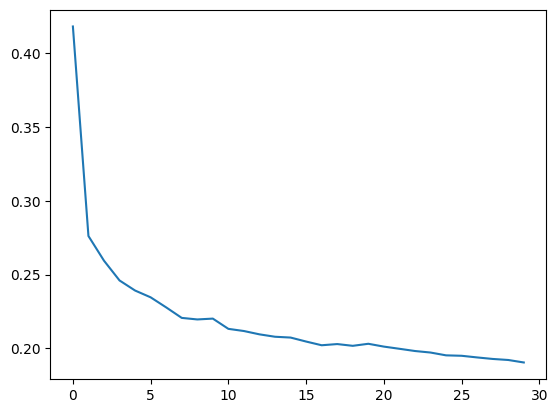

None
Tanh()
Finished epoch 0, latest loss 0.09784911572933197
Best MSE: 0.09784911572933197
Finished epoch 1, latest loss 0.3233596086502075
Best MSE: 0.0973701998591423
Finished epoch 2, latest loss 0.16841177642345428
Best MSE: 0.0973701998591423
Finished epoch 3, latest loss 0.47787007689476013
Best MSE: 0.08675139397382736
Finished epoch 4, latest loss 0.3160070478916168
Best MSE: 0.08675139397382736
Finished epoch 5, latest loss 0.11838261783123016
Best MSE: 0.07333400845527649
Finished epoch 6, latest loss 0.2262914776802063
Best MSE: 0.06915788352489471
Finished epoch 7, latest loss 0.5008841753005981
Best MSE: 0.06915788352489471
Finished epoch 8, latest loss 0.22052566707134247
Best MSE: 0.06906131654977798
Finished epoch 9, latest loss 0.5536048412322998
Best MSE: 0.06017516553401947
Finished epoch 10, latest loss 0.356832355260849
Best MSE: 0.06017516553401947
Finished epoch 11, latest loss 0.12245878577232361
Best MSE: 0.06017516553401947
Finished epoch 12, latest loss 0.14

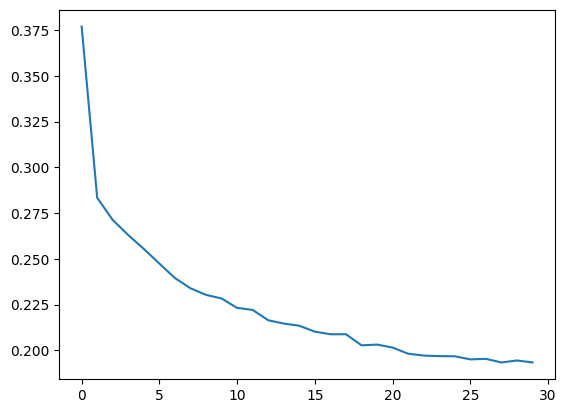

None


In [5]:
def model_batch(activation):
      model_batch = nn.Sequential(
            nn.Linear(8, 100),
            nn.BatchNorm1d(100), 
            activation,
            nn.Linear(100, 50),
            nn.BatchNorm1d(50), 
            activation,
            nn.Linear(50, 10),
            nn.BatchNorm1d(10), 
            activation,
            nn.Linear(10, 1))
      model_batch.to(device=device)
      return model_batch

for activation in activation_lst:
      print(activation)
      print(train_model(model_batch(activation)))